In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


The following attempt at my first machine learning problem has been inspired with the help of the following notebook:
https://www.kaggle.com/pralabhpoudel/house-price-prediction/notebook

In [19]:
#Important Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#Loading Data
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [20]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [22]:
#For missing value handling, we will remove columns that have more than 80% values as missing
missing_percent = (train_data.isnull().sum()/len(train_data))*100
df = pd.DataFrame(missing_percent)
df

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


No meaningful values are being obtained, so arranged the data in descending order.

In [23]:
missing_percent = missing_percent[missing_percent>0].sort_values(ascending=False)

In [24]:
df=pd.DataFrame(missing_percent)
df

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [25]:
#Dropping all values above 80% and ID, since ID has no relation with predicting Sales Price practically
train_data=train_data.drop(['PoolQC','Id','Alley','Fence','MiscFeature'], axis=1)

In [26]:
#Similarly for test data
missing_percent2 = (test_data.isnull().sum()/len(test_data))*100
missing_percent2 = missing_percent2[missing_percent2>0].sort_values(ascending=False)
df = pd.DataFrame(missing_percent2)
df

,0
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageCond,5.346127
GarageYrBlt,5.346127
GarageQual,5.346127
GarageFinish,5.346127


In [27]:
test_id = test_data['Id']
test_data = test_data.drop(['PoolQC','Id','Alley','Fence','MiscFeature'], axis=1)
X_test = test_data

Now to manage the other features, we can either replace with median, value_counts or with 'None' values etc.

In [28]:
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('None')
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['GarageCond']=train_data['GarageCond'].fillna('None')
train_data['GarageQual']=train_data['GarageQual'].fillna('None')
train_data['GarageFinish']=train_data['GarageFinish'].fillna('None')
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
train_data['GarageType']=train_data['GarageType'].fillna('None')
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('None')
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna("None")
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('None')
train_data['BsmtCond']=train_data['BsmtCond'].fillna('None')
train_data['BsmtQual']=train_data['BsmtQual'].fillna('None')
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)
train_data['MasVnrType']=train_data['MasVnrArea'].fillna("Others")
train_data['Electrical']=train_data['Electrical'].fillna('None')

In [29]:
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna('None')
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].median())
test_data['GarageCond']=test_data['GarageCond'].fillna('None')
test_data['GarageQual']=test_data['GarageQual'].fillna('None')
test_data['GarageFinish']=test_data['GarageFinish'].fillna('None')
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())
test_data['GarageType']=test_data['GarageType'].fillna('None')
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna('None')
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna("None")
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna('None')
test_data['BsmtCond']=test_data['BsmtCond'].fillna('None')
test_data['BsmtQual']=test_data['BsmtQual'].fillna('None')
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)
test_data['MasVnrType']=test_data['MasVnrArea'].fillna("Others")
test_data['Electrical']=test_data['Electrical'].fillna('None')

Now we investigate correlation of the data.

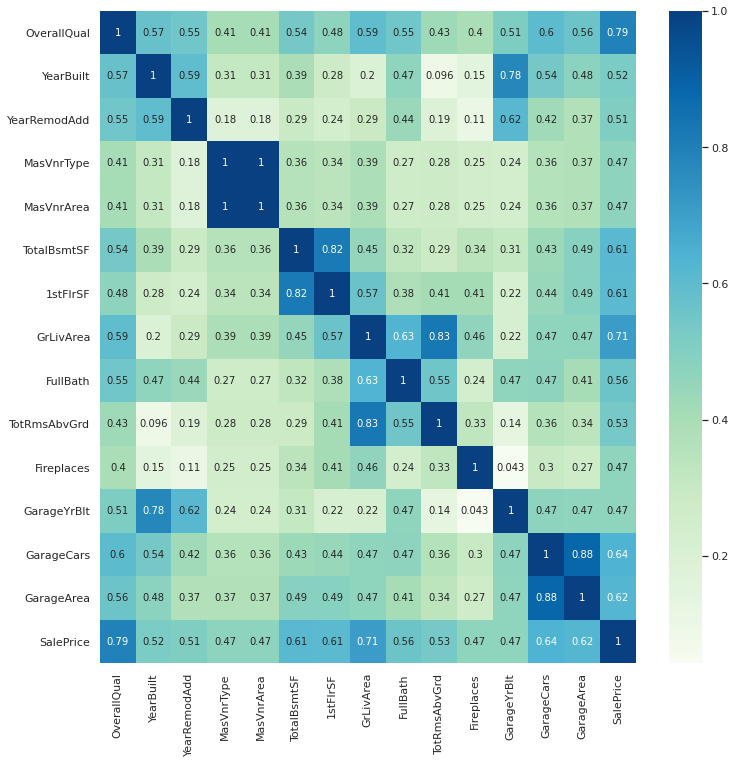

In [30]:
correlation=train_data.corr()
Positive_Related=correlation.index[abs(correlation["SalePrice"])>0.4]

plt.figure(figsize=(12,12))
Corr_Heatmap=sns.heatmap(train_data[Positive_Related].corr(),annot=True,cmap="GnBu")

So OverallQual and GrLivArea have the highest positive correlation.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

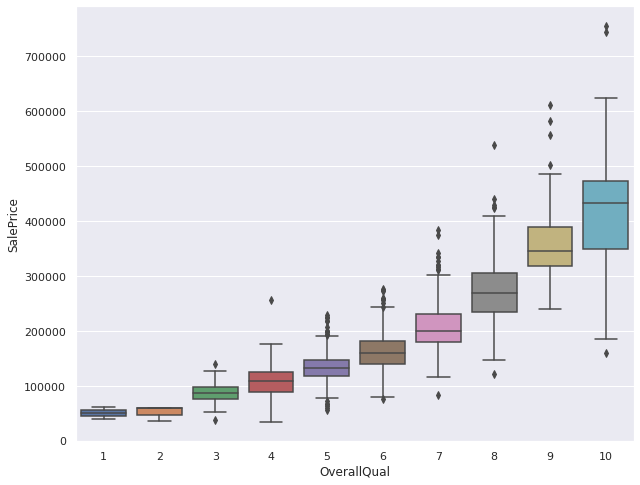

In [31]:
#OverallQual is categorical so boxplot to check for outliers

sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

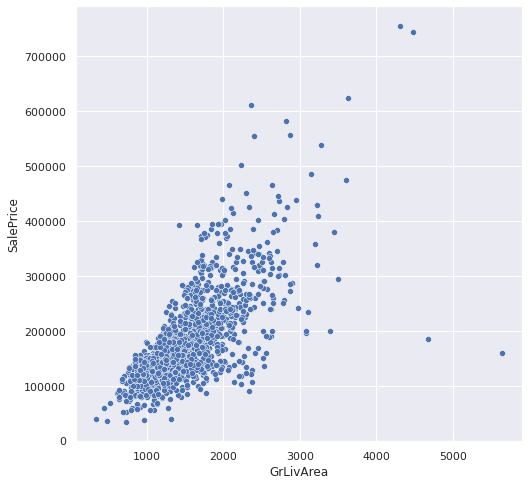

In [32]:
#Similarly Scatterplot for GrLivArea

sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)


In [33]:
#Delete the outliers from GrLivArea as possible
train_data=train_data.drop(train_data[(train_data['GrLivArea']>4000)&(train_data['SalePrice']>400000)].index)

In [34]:
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y=train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data,y,train_size=0.8, test_size=0.2,random_state=100)

In [38]:
categorical_cols = [cname for cname in train_data.columns if
                    train_data[cname].nunique() < 10 and 
                    train_data[cname].dtype == "object"]
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [40]:
numerical_cols = [cname for cname in train_data.columns if 
                train_data[cname].dtype in ['int64', 'float64']]

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
#Performing Pipelining
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model=XGBRegressor(n_estimators=500,learning_rate=0.01,n_jobs=2)

In [43]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

In [44]:
clf.fit(train_data,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrType',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'H...
                              colsample_bytree

In [45]:
preds = clf.predict(X_test)

In [47]:
print(clf.score(train_data,y))

0.9868795124271953


In [48]:
output=pd.DataFrame({'Id':test_id,'SalePrice':preds})
print(output)


        Id      SalePrice
0     1461  123479.203125
1     1462  153526.312500
2     1463  182224.359375
3     1464  184489.187500
4     1465  181031.093750
...    ...            ...
1454  2915   82264.617188
1455  2916   85051.734375
1456  2917  159129.921875
1457  2918  117403.929688
1458  2919  207968.531250

[1459 rows x 2 columns]


In [49]:
output = pd.DataFrame({'Id':test_id,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)